In [ ]:
! pip install category_encoders
!pip install sweetviz
!pip install xgboost
!pip install catboost


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer

from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
import catboost
import sweetviz
import category_encoders as ce
import xgboost
import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv("C:\\Users\\manideep\\Downloads\\daily_offers.xlsx - Result 1.csv")

In [3]:
df.shape

(181673, 14)

In [4]:
df.status.unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable', nan], dtype=object)

In [5]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [6]:
xer = df["status"]

In [7]:
xer.head()

0    Won
1    Won
2    Won
3    Won
4    Won
Name: status, dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [9]:
df.describe()

,item_date,customer,country,application,thickness,width,product_ref,delivery date,selling_price
count,1.816720e+05,1.816720e+05,181645.000000,181649.000000,181672.000000,181673.000000,1.816730e+05,1.816720e+05,1.816720e+05
mean,2.020459e+07,3.051221e+07,44.893022,25.615809,2.564827,1295.286724,4.739679e+08,2.020738e+07,1.918036e+03
std,4.551119e+03,2.433382e+07,24.404214,17.754175,6.572321,261.631754,7.175101e+08,2.411059e+04,3.317956e+05
min,1.995000e+07,1.245800e+04,25.000000,2.000000,0.180000,1.000000,6.117280e+05,2.019040e+07,-1.160000e+03
25%,2.020093e+07,3.019688e+07,26.000000,10.000000,0.700000,1180.000000,6.119930e+05,2.020110e+07,6.690000e+02
50%,2.020113e+07,3.020524e+07,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,2.021010e+07,8.120000e+02
75%,2.021020e+07,3.028042e+07,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,2.021040e+07,9.530000e+02
max,2.021040e+07,2.147484e+09,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,3.031010e+07,1.000010e+08


In [10]:
df["material_ref"]

0                                      DEQ1 S460MC
1         0000000000000000000000000000000000104991
2                                         S0380700
3                          DX51D+ZM310MAO 2.3X1317
4                                  2_S275JR+AR-CL1
                            ...                   
181668    0000000000000000000000000000000001000777
181669    0000000000000000000000000000000001000227
181670    0000000000000000000000000000000001004216
181671    0000000000000000000000000000000001001149
181672    0000000000000000000000000000000001005439
Name: material_ref, Length: 181673, dtype: object

In [11]:
a = df["material_ref"].str.startswith("0000000000")
b = (a==True)
df["material_ref"][b] = np.NAN
df.head()



,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [12]:
df["quantity tons"].values[173086] = 0


In [13]:
df['delivery date'] = pd.to_datetime(df['delivery date'])
df['item_date'] = pd.to_datetime(df['item_date'])
df["quantity tons"] = pd.to_numeric(df["quantity tons"])
# , errors = 'coerce

In [14]:
df.drop(columns = ["id"], axis = 1, inplace = True)

In [15]:
cols = ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'selling_price'  ,'status', 'item type', 'material_ref', 'product_ref']

In [16]:
cont_cols = ['quantity tons', 'customer', 'country', 'application', 'thickness', 'width', 'selling_price']
cat_cols = [ 'status', 'item type', 'material_ref', 'product_ref']

In [17]:
for i in cols:
     if i == 'thickness':
          si = SimpleImputer(strategy = 'median')       
          df[i] = si.fit_transform(np.array(df[i]).reshape(-1,1))
     elif i in cat_cols:
          si = SimpleImputer(strategy = 'most_frequent')       
          df[i] = si.fit_transform(np.array(df[i]).reshape(-1,1))
     else:
          print(i)
          si = SimpleImputer(strategy = 'mean')
          df[i] = si.fit_transform(np.array(df[i]).reshape(-1,1))

quantity tons
customer
country
application
width
selling_price


In [18]:
for i in cols:
    if i in cont_cols:
            print(i, df[i].apply(lambda x : isinstance(x, float) or isinstance(x, int)).all())
            
    


quantity tons True
customer True
country True
application True
thickness True
width True
selling_price True


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   item_date      181672 non-null  datetime64[ns]
 1   quantity tons  181673 non-null  float64       
 2   customer       181673 non-null  float64       
 3   country        181673 non-null  float64       
 4   status         181673 non-null  object        
 5   item type      181673 non-null  object        
 6   application    181673 non-null  float64       
 7   thickness      181673 non-null  float64       
 8   width          181673 non-null  float64       
 9   material_ref   181673 non-null  object        
 10  product_ref    181673 non-null  int64         
 11  delivery date  181672 non-null  datetime64[ns]
 12  selling_price  181673 non-null  float64       
dtypes: datetime64[ns](2), float64(7), int64(1), object(3)
memory usage: 18.0+ MB


In [20]:
df.isnull().sum()

item_date        1
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    1
selling_price    0
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
material_ref     0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [23]:
df.duplicated().unique()

array([False])

In [24]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,854.00
1,1970-01-01 00:00:00.020210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,1970-01-01 00:00:00.020210401,1047.00
2,1970-01-01 00:00:00.020210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,644.33
3,1970-01-01 00:00:00.020210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,768.00
4,1970-01-01 00:00:00.020210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,577.00


In [25]:
for i in cont_cols:
    print(i, df[i].skew())

quantity tons 424.6884787783041
customer 86.98482929193453
country 0.7536622041398789
application 0.7243906708830958
thickness 303.44619573382073
width 0.37460387055601996
selling_price 301.386428888825


In [26]:
df["selling_price"]

0          854.00
1         1047.00
2          644.33
3          768.00
4          577.00
           ...   
181668     591.00
181669     589.00
181670     619.00
181671     601.00
181672     607.00
Name: selling_price, Length: 181671, dtype: float64

In [27]:
y = df["selling_price"]
y[y <= 0] = 1e-8
y = np.log(np.array(y))
y[y == np.inf] = np.nan
y[y == -np.inf] = np.nan
si = SimpleImputer(strategy = 'mean')
y = si.fit_transform(np.array(y).reshape(-1,1))

In [28]:
df["selling_price"] = y

In [29]:
df["selling_price"].skew()

-7.780198090218454

In [30]:
df["selling_price"].shape

(181671,)

In [31]:
df.shape

(181671, 13)

In [32]:
df["selling_price"]

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181668    6.381816
181669    6.378426
181670    6.428105
181671    6.398595
181672    6.408529
Name: selling_price, Length: 181671, dtype: float64

In [33]:
cat_cols

['status', 'item type', 'material_ref', 'product_ref']

In [34]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [35]:
df["selling_price"]

0         6.749931
1         6.953684
2         6.468211
3         6.643790
4         6.357842
            ...   
181668    6.381816
181669    6.378426
181670    6.428105
181671    6.398595
181672    6.408529
Name: selling_price, Length: 181671, dtype: float64

In [36]:
df.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [37]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,1970-01-01 00:00:00.020210401,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,1970-01-01 00:00:00.020210701,6.749931
1,1970-01-01 00:00:00.020210401,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,DX51D+Z,1668701718,1970-01-01 00:00:00.020210401,6.953684
2,1970-01-01 00:00:00.020210401,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,1970-01-01 00:00:00.020210101,6.468211
3,1970-01-01 00:00:00.020210401,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,1970-01-01 00:00:00.020210101,6.643790
4,1970-01-01 00:00:00.020210401,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,1970-01-01 00:00:00.020210301,6.357842


[]

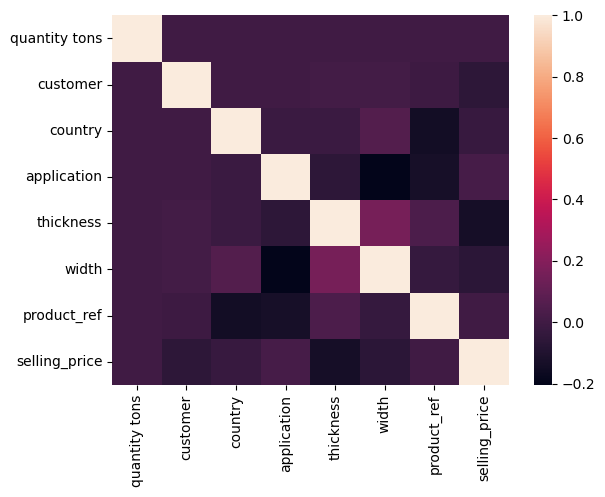

In [38]:
sns.heatmap(df.corr()).plot()

In [39]:
my_report = sweetviz.analyze([df, "Train"], target_feat = "selling_price")

                                             |                                             | [  0%]   00:00 ->…

In [40]:
my_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [39]:
df['delivery_time'] = (df['delivery date'] - df['item_date']).dt.total_seconds() # CALCULATING DIFFERENCES IN SECONDS
df = df.drop(columns = ["delivery date", "item_date"])

In [40]:
df["delivery_time"]

0         3.000000e-07
1         0.000000e+00
2        -3.000000e-07
3        -3.000000e-07
4        -1.000000e-07
              ...     
181668   -1.000000e-09
181669   -1.000000e-09
181670   -1.000000e-09
181671   -1.000000e-09
181672   -1.000000e-09
Name: delivery_time, Length: 181671, dtype: float64

In [41]:
df["quantity tons"] = winsorize(df["quantity tons"], limits = [0.1, 0.1])
df["thickness"] = winsorize(df["thickness"], limits = [0.1, 0.1])

quantity tons       AxesSubplot(0.125,0.11;0.0731132x0.77)
customer         AxesSubplot(0.212736,0.11;0.0731132x0.77)
country          AxesSubplot(0.300472,0.11;0.0731132x0.77)
application      AxesSubplot(0.388208,0.11;0.0731132x0.77)
thickness        AxesSubplot(0.475943,0.11;0.0731132x0.77)
width            AxesSubplot(0.563679,0.11;0.0731132x0.77)
product_ref      AxesSubplot(0.651415,0.11;0.0731132x0.77)
selling_price    AxesSubplot(0.739151,0.11;0.0731132x0.77)
delivery_time    AxesSubplot(0.826887,0.11;0.0731132x0.77)
dtype: object

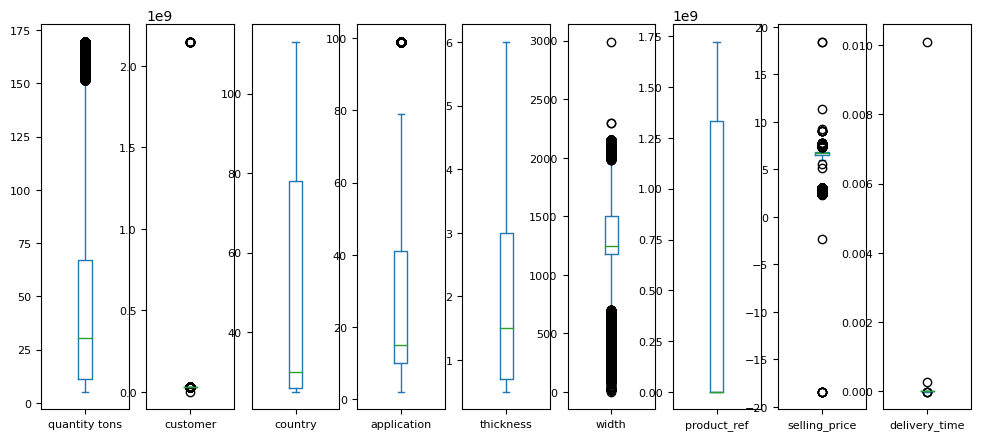

In [42]:
df.plot(kind = "box", subplots = True, figsize = (12,5), fontsize = 8)

In [43]:
df[['quantity tons','width', 'selling_price']]

,quantity tons,width,selling_price
0,54.151139,1500.0,6.749931
1,169.422752,1210.0,6.953684
2,169.422752,952.0,6.468211
3,169.422752,1317.0,6.643790
4,169.422752,2000.0,6.357842
...,...,...,...
181668,102.482422,1220.0,6.381816
181669,169.422752,1500.0,6.378426
181670,5.119882,1250.0,6.428105
181671,5.119882,1250.0,6.398595


In [44]:
for col in ['quantity tons', 'width', 'selling_price']:
    df[col] = winsorize(df[col], limits=[0.1, 0.1])


In [45]:
df[['quantity tons','width', 'selling_price']]

,quantity tons,width,selling_price
0,54.151139,1500.0,6.749931
1,169.422752,1210.0,6.953684
2,169.422752,1000.0,6.468211
3,169.422752,1317.0,6.643790
4,169.422752,1500.0,6.357842
...,...,...,...
181668,102.482422,1220.0,6.381816
181669,169.422752,1500.0,6.378426
181670,5.119882,1250.0,6.428105
181671,5.119882,1250.0,6.398595


<AxesSubplot:>

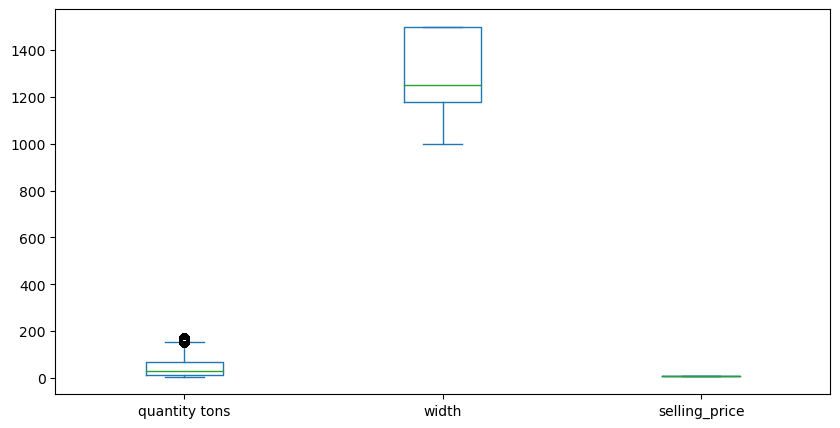

In [46]:
df[['quantity tons','width', 'selling_price']].plot.box(figsize = (10,5))

In [47]:
copy = df

In [48]:
import category_encoders as ce
target_en = ce.TargetEncoder(cols = cat_cols)
df = target_en.fit_transform(df.drop(columns = ["selling_price"]), df["selling_price"])
df["selling_price"] = y
            

In [49]:
ms = MinMaxScaler()
for i in df.columns:
    df[i] = ms.fit_transform(np.array(df[i]).reshape(-1,1))
    

In [50]:
df.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_time,selling_price
0,0.29842,0.014037,0.034091,0.618022,0.878366,0.082474,0.272727,1.000,0.546650,0.109216,0.001988,0.683216
1,1.00000,0.014059,0.000000,0.618022,0.878366,0.402062,0.054545,0.420,0.544231,0.494425,0.001958,0.688746
2,1.00000,0.014036,0.056818,0.618022,0.000000,0.268041,0.000000,0.000,0.471972,0.132219,0.001929,0.675569
3,1.00000,0.014127,0.079545,0.618022,0.694520,0.587629,0.327273,0.634,0.540255,0.494425,0.001929,0.680335
4,1.00000,0.014063,0.034091,0.618022,0.878366,0.082474,0.636364,1.000,0.357532,0.000000,0.001948,0.672573


In [51]:
x = df.iloc[:, :12]
y =  df['selling_price']

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2,  random_state = 5)

In [53]:
lr = LinearRegression()
lr.fit(x_train, y_train)
tr_preds = lr.predict(x_train)
print(r2_score(tr_preds, y_train))
te_preds = lr.predict(x_test)
print(r2_score(te_preds, y_test))

1.0
1.0


In [54]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)
tr_preds = dt.predict(x_train)
print(r2_score(tr_preds, y_train))
te_preds = dt.predict(x_test)
print(r2_score(te_preds, y_test))

0.9999999999995943
0.9995474888359184


In [55]:
from collections import Counter
Counter(copy["status"])

Counter({'Won': 116011,
         'Draft': 3140,
         'To be approved': 4170,
         'Lost': 34437,
         'Not lost for AM': 19573,
         'Wonderful': 1,
         'Revised': 4276,
         'Offered': 53,
         'Offerable': 10})

In [56]:
copy["status"]

0         Won
1         Won
2         Won
3         Won
4         Won
         ... 
181668    Won
181669    Won
181670    Won
181671    Won
181672    Won
Name: status, Length: 181671, dtype: object

In [57]:
copy["status"].values[1]

'Won'

In [58]:
for i in range(len(df["status"])):
    if copy["status"].values[i] not in ["Won", "Lost"]:
        copy["status"].values[i] = np.nan
       


In [59]:
len(df["status"])

181671

In [60]:
from collections import Counter
Counter(copy["status"])

Counter({'Won': 116011, nan: 31223, 'Lost': 34437})

In [61]:
copy = copy.dropna()

In [62]:
cat_cols = ['item type', 'material_ref', 'product_ref']

In [63]:
target_en = ce.TargetEncoder(cols = cat_cols)
copy = target_en.fit_transform(copy.drop(columns = ["selling_price"]), copy["selling_price"])
copy["selling_price"] = y


In [64]:
le = LabelEncoder()
copy["status"] = le.fit_transform(np.array(copy["status"]).reshape(-1,1))


In [65]:
copy.head()

,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery_time,selling_price
0,54.151139,30156308.0,28.0,1,6.705322,10.0,2.0,1500.0,6.696779,6.588094,3.000000e-07,0.683216
1,169.422752,30202938.0,25.0,1,6.705322,41.0,0.8,1210.0,6.693881,6.769853,0.000000e+00,0.688746
2,169.422752,30153963.0,30.0,1,6.540711,28.0,0.5,1000.0,6.655926,6.599879,-3.000000e-07,0.675569
3,169.422752,30349574.0,32.0,1,6.661978,59.0,2.3,1317.0,6.693124,6.769853,-3.000000e-07,0.680335
4,169.422752,30211560.0,28.0,1,6.705322,10.0,4.0,1500.0,6.588814,6.540460,-1.000000e-07,0.672573


In [66]:
y = copy["status"]


In [67]:
x = copy.drop(columns = ["status"], axis = 1)


In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [69]:
lg = LogisticRegression()
lg.fit(x_train, y_train)
tr_preds = lg.predict(x_train)
print("acc of tr", accuracy_score(tr_preds, y_train))
te_preds = lg.predict(x_test)
print("acc of te", accuracy_score(te_preds, y_test))

acc of tr 0.7715232888549162
acc of te 0.7694250581588568


In [70]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
tr_preds = knn.predict(x_train)
print("acc of tr", accuracy_score(tr_preds, y_train))
te_preds = knn.predict(x_test)
print("acc of te", accuracy_score(te_preds, y_test))


acc of tr 0.9107329799431696
acc of te 0.8700564971751412


In [73]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
tr_preds = dt.predict(x_train)
print("acc of tr", accuracy_score(tr_preds, y_train))
te_preds = dt.predict(x_test)
print("acc of te", accuracy_score(te_preds, y_test))

acc of tr 0.9998753718074411
acc of te 0.9294782319707544


In [71]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
tr_preds = rf.predict(x_train)
te_preds = rf.predict(x_test)
print("acc of tr : ", accuracy_score(tr_preds, y_train))
print("acc of te : ", accuracy_score(te_preds, y_test))

acc of tr :  0.9998005948919059
acc of te :  0.9453971419076105


In [ ]:
xg = XGBClassifier()
xg.fit(x_train, y_train)
tr_preds = xg.predict(x_train)
te_preds = xg.predict(x_test)
print("acc of tr : ", accuracy_score(tr_preds, y_train))
print("acc of te : ", accuracy_score(te_preds, y_test))


In [ ]:
ab = AdaBoostClassifier()
ab.fit(x_train, y_train)
tr_preds = ab.predict(x_train)
te_preds = ab.predict(x_test)
print("acc of tr : ", accuracy_score(tr_preds, y_train))
print("acc of te : ", accuracy_score(te_preds, y_test))


In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
tr_preds = gb.predict(x_train)
te_preds = gb.predict(x_test)
print("acc of tr : ", accuracy_score(tr_preds, y_train))
print("acc of te : ", accuracy_score(te_preds, y_test))


In [ ]:
cb = CatBoostClassifier()
cb.fit(x_train, y_train)
tr_preds = cb.predict(x_train)
te_preds = cb.predict(x_test)
print("acc of tr : ", accuracy_score(tr_preds, y_train))
print("acc of te : ", accuracy_score(te_preds, y_test))


In [72]:
!pip install streamlit

In [73]:
import streamlit as st
new = pd.DataFrame(columns = ['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date'])
new1 = pd.DataFrame(columns = ['item_date', 'quantity tons', 'customer', 'country',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date'])
st.title("Industrial Copper Modeling")  # Setting the title of the page
if st.button("Regression"):
          for i in ["item_date", "quantity tons", "customer", "status", "item type", "application", "thickness", "width", "material_ref", "product_ref", "delivery date"]:
                      a = st.text_input(i)
                      new[i] = a
          c = lr.predict(new[i])
          st.write(c)
if st.button("Classification"):
            for i in ["item_date", "quantity tons", "customer", "item type", "application", "thickness",
                      "width", "material_ref", "product_ref", "delivery date", "selling_price"]:
                b = st.text_input(i)
                new[i] = a
            c = lr.predict(new[i])
            st.write(c)








2023-05-07 07:53:23.697 
  command:

    streamlit run C:\Users\manideep\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
